In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from numpy import median,mean
from scipy import stats

import json
import wordcloud

%matplotlib inline

In [3]:
ls

README.md          data/              eda_project.ipynb  images/


In [4]:
ls data

US_category_id.json  USvideos.csv


In [5]:
!head -1 data/USvideos.csv

In [6]:
data=pd.read_csv('data/USvideos.csv', delimiter=',')
data.head(3)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [7]:
data.count()

video_id                  40949
trending_date             40949
title                     40949
channel_title             40949
category_id               40949
publish_time              40949
tags                      40949
views                     40949
likes                     40949
dislikes                  40949
comment_count             40949
thumbnail_link            40949
comments_disabled         40949
ratings_disabled          40949
video_error_or_removed    40949
description               40379
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,40949.0,1.997243e+01,7.568327e+00,1.0,17.0,24.0,25.0,43.0
views,40949.0,2.360785e+06,7.394114e+06,549.0,242329.0,681861.0,1823157.0,225211923.0
likes,40949.0,7.426670e+04,2.288853e+05,0.0,5424.0,18091.0,55417.0,5613827.0
dislikes,40949.0,3.711401e+03,2.902971e+04,0.0,202.0,631.0,1938.0,1674420.0
comment_count,40949.0,8.446804e+03,3.743049e+04,0.0,614.0,1856.0,5755.0,1361580.0


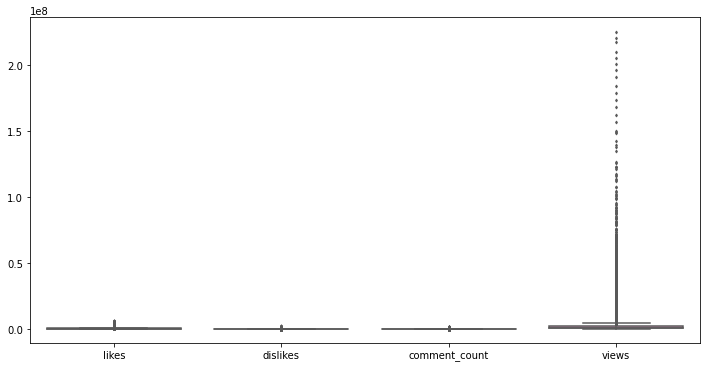

In [10]:
fig, ax = plt.subplots(figsize=(12,6)) 
_=sns.boxplot(data=data, order=['likes','dislikes','comment_count','views'],palette='Set2',fliersize=2)

**Given dataset represents content issues between 2006-2018** 

In [11]:
data['date']=pd.to_datetime(data.iloc[:,5])
data['date'].dt.year.value_counts()
#data['dayofweek']=data['date'].dt.dayofweek
# data['date'].dt.day.value_counts().nlargest()

2018    30279
2017    10428
2013       44
2015       35
2016       35
2014       32
2011       27
2012       24
2010       19
2009       14
2008       11
2006        1
Name: date, dtype: int64

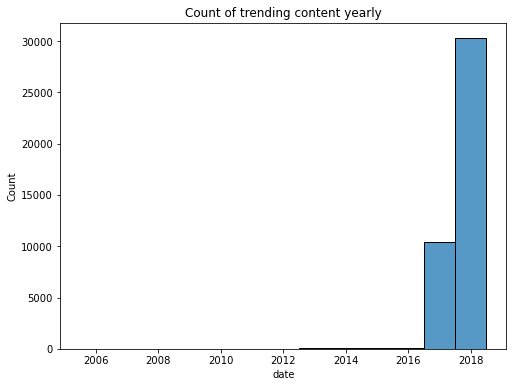

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=data, x=data['date'].dt.year, discrete=True)
plt.title('Count of trending content yearly')
plt.show()
#plt.savefig('count_trends.png', dpi=100)

In [13]:
data.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


**LETS SEE CORRELATION BETWEEN VARIABLES**


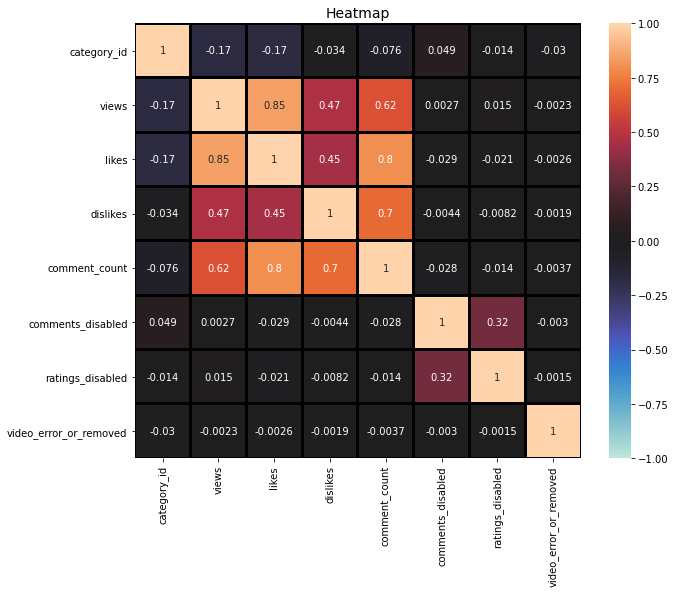

In [14]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, center=0, linewidths=2, linecolor='black')
plt.title('Heatmap', fontsize=14)
plt.show()

#plt.savefig('data_correlation.png')

**LETS SEE THE RELATIONSHIPS BETWEEN TWO VARIABLES**

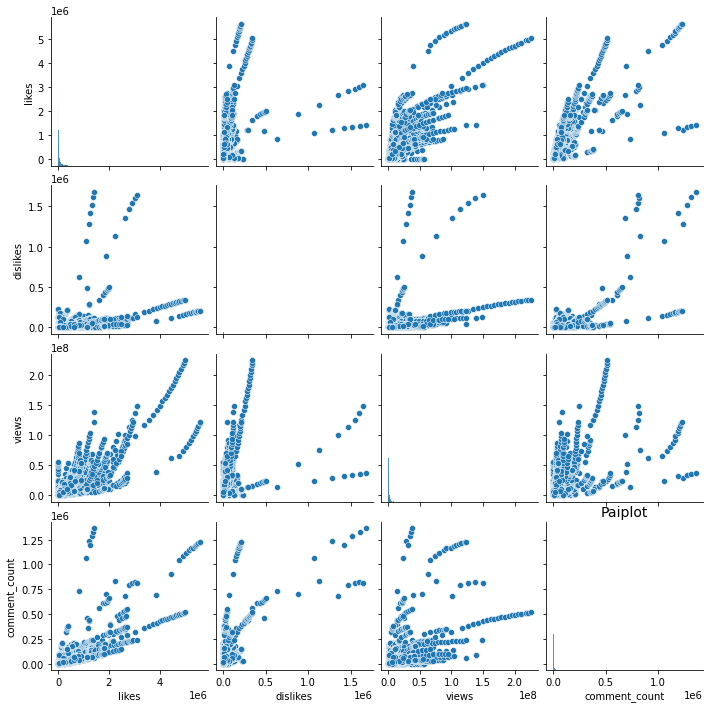

In [15]:
z=data[['likes','dislikes','views','comment_count']]
sns.pairplot(data=z)
plt.title('Paiplot',fontsize=14)
plt.show()

**WHAT CATEGORY HAS MORE CONTENT?**

In [16]:
data.category_id.value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

**So, we can see the top categories, but what is the name of these?** 

In [17]:
with open('data/US_category_id.json') as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
data['category_name'] = data['category_id'].map(cat_dict)

In [18]:
data.category_name.value_counts()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category_name, dtype: int64

**Counts of times video was in YouTube trend in each category**

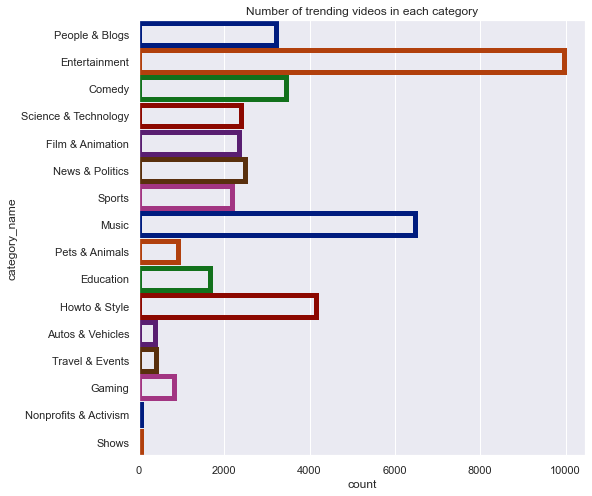

In [59]:
sns.set()
fig, ax = plt.subplots(figsize=(8,8))

_=sns.countplot(y="category_name", data=data,facecolor=(0, 0, 0, 0),linewidth=5, orient='h',
                   edgecolor=sns.color_palette("dark", 7),ax=ax)
_.set_title('Number of trending videos in each category')
#plt.savefig('num_trends_by_category.png')
plt.show()

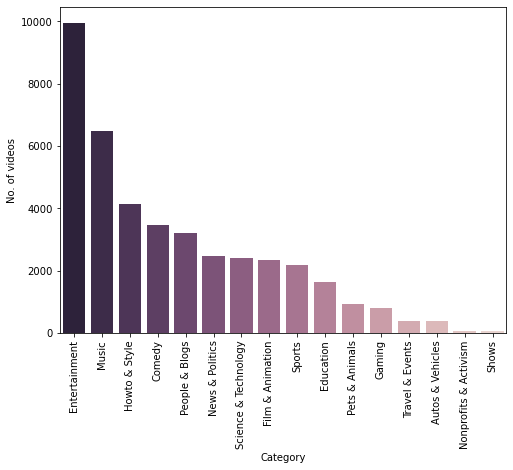

In [20]:
cat_name = data["category_name"].value_counts().to_frame().reset_index()
cat_name.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.barplot(x="category_name", y="No_of_videos", data=cat_name, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

#plt.savefig('Youtube category.png')

**WHAT VIDEO CONTENT DOES THE  ENTERTAINMENT CATEGORY CONSIST OF?**

In [21]:
max_trend=data[data['category_name']=='Entertainment']
s=max_trend[['title','channel_title']]
s.describe().T

,count,unique,top,freq
title,9964,1645,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,30
channel_title,9964,478,TheEllenShow,193


In [22]:
max_trend.channel_title.value_counts().nlargest(20)


TheEllenShow                            193
Netflix                                 193
Saturday Night Live                     175
The Late Show with Stephen Colbert      161
HellthyJunkFood                         153
Warner Bros. Pictures                   150
FBE                                     149
Good Mythical Morning                   147
Vanity Fair                             144
The Late Late Show with James Corden    137
The Voice                               121
James Charles                           118
Jimmy Kimmel Live                       118
Marvel Entertainment                    117
Binging with Babish                     112
Complex                                 109
E! Entertainment                        108
Star Wars                               106
Universal Pictures                      106
REACT                                   103
Name: channel_title, dtype: int64

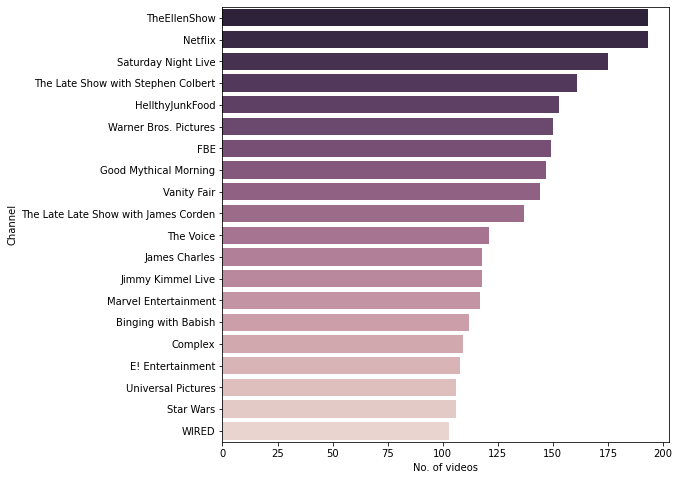

In [23]:
cdf = max_trend.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

**What are the most common words in trending video titles?**

In [24]:
title_words = list(max_trend["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 3655),
 ('-', 2622),
 ('The', 1819),
 ('Trailer', 931),
 ('the', 885),
 ('Official', 738),
 ('a', 673),
 ('to', 610),
 ('with', 598),
 ('2018', 595),
 ('&', 564),
 ('and', 557),
 ('A', 551),
 ('on', 529),
 ('of', 461),
 ('I', 433),
 ('in', 403),
 ('[HD]', 345),
 ('for', 324),
 ('Season', 323),
 ('With', 320),
 ('To', 261),
 ('In', 252),
 ('Star', 252),
 ('How', 236)]

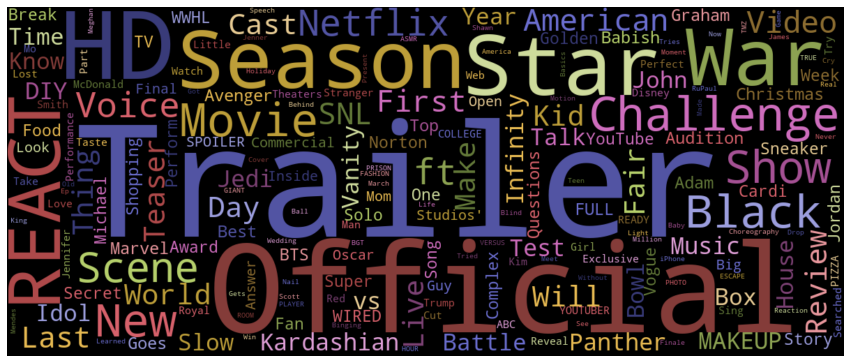

In [25]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="black", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")
#plt.savefig('word_count.png')

**LETS SEE LIKES/DISLIKES/VIEWS DISTRIBUTION AMONG TRENDING CONTENT**


In [26]:

data.groupby('category_name').agg('median').sort_values(by='views',ascending=False)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_name,,,,,,,,
Gaming,20.0,1494142.0,51057.0,1956.0,8871.0,False,False,False
Music,10.0,1434128.0,62280.5,1243.5,3906.0,False,False,False
Film & Animation,1.0,1274578.0,25176.0,1022.0,2636.0,False,False,False
Shows,43.0,1155692.0,21537.0,465.0,1648.0,False,False,False
Comedy,23.0,980236.0,30214.0,956.0,2604.0,False,False,False
Entertainment,24.0,734704.0,16234.0,627.0,1693.5,False,False,False
People & Blogs,22.0,599139.0,19438.0,555.5,1678.0,False,False,False
Science & Technology,28.0,585748.0,16328.0,589.0,1734.0,False,False,False
Sports,17.0,559352.0,5700.5,343.0,1127.5,False,False,False


In [27]:
cols=['views', 'likes','dislikes','comment_count']
data.groupby('category_name')[cols].max().sort_values(by='views', ascending=False)

,views,likes,dislikes,comment_count
category_name,,,,
Music,225211923,5613827,343541,1228655
Entertainment,149376127,3093544,1674420,1361580
People & Blogs,56111957,2032463,228426,383762
Film & Animation,54863912,922355,38082,108849
Howto & Style,54155921,605954,66632,203884
Science & Technology,42799458,564804,47469,180913
Comedy,29178096,865679,29865,81051
Sports,29090799,1121217,176903,83660
Autos & Vehicles,25244097,97030,12290,10591


**MOST POPULAR CONTENT IN MUSIC CATEGORY**

In [28]:
music=data[data['category_name']=='Music']
x=music[['title','channel_title']]
x.describe().T

,count,unique,top,freq
title,6472,821,Charlie Puth - BOY [Official Audio],29
channel_title,6472,443,PTXofficial,90


In [29]:
#top 10 trending videos with higher number of views in music category
music.groupby(['title','channel_title', 'date'])[['views','likes','dislikes']].max().sort_values(by='views',ascending=False).head(10)


,,,views,likes,dislikes
title,channel_title,date,,,
Childish Gambino - This Is America (Official Video),ChildishGambinoVEVO,2018-05-06 04:00:07+00:00,225211923,5023450,343541
Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,2018-04-20 04:00:03+00:00,148689896,3094021,129502
"Becky G, Natti Natasha - Sin Pijama (Official Video)",BeckyGVEVO,2018-04-20 10:40:51+00:00,139334502,1425496,119798
BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,2018-05-18 09:00:02+00:00,123010920,5613827,206892
The Weeknd - Call Out My Name (Official Video),TheWeekndVEVO,2018-04-12 16:00:04+00:00,122544931,1427436,40837
"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,2017-11-17 05:00:01+00:00,102012605,2376636,117196
"Cardi B, Bad Bunny & J Balvin - I Like It [Official Music Video]",Cardi B,2018-05-29 14:05:10+00:00,94254507,1816753,102474
Maluma - El Préstamo (Official Video),MalumaVEVO,2018-03-09 11:00:01+00:00,87264467,815369,71494
Taylor Swift - Delicate,TaylorSwiftVEVO,2018-03-12 01:15:10+00:00,71560694,1928392,113990


**Most viewed video at Youtube in beetween 2017-2018**
https://www.youtube.com/watch?v=VYOjWnS4cMY

In [30]:
# top 10 trending content amongst all categories
data.groupby(['category_name','title','channel_title'])[['views','likes','dislikes']].max().sort_values(by='views',
                                                                            ascending=False).head(10)

views  \
category_name title                                              channel_title                     
Music         Childish Gambino - This Is America (Official Vi... ChildishGambinoVEVO   225211923   
Entertainment YouTube Rewind: The Shape of 2017 | #YouTubeRewind YouTube Spotlight     149376127   
Music         Ariana Grande - No Tears Left To Cry               ArianaGrandeVevo      148689896   
              Becky G, Natti Natasha - Sin Pijama (Official V... BeckyGVEVO            139334502   
              BTS (방탄소년단) 'FAKE LOVE' Official MV                ibighit               123010920   
              The Weeknd - Call Out My Name (Official Video)     TheWeekndVEVO         122544931   
              Luis Fonsi, Demi Lovato - Échame La Culpa          LuisFonsiVEVO         102012605   
              Cardi B, Bad Bunny & J Balvin - I Like It [Offi... Cardi B                94254507   
Entertainment Marvel Studios' Avengers: Infinity War Official... Marvel Entertainment   91933007   
Music         Maluma - El Préstamo (Official Video)              MalumaVEVO             87264467   

                                                                                         likes  \
category_name title                                              channel_title                   
Music         Childish Gambino - This Is America (Official Vi... ChildishGambinoVEVO   5023450   
Entertainment YouTube Rewind: The Shape of 2017 | #YouTubeRewind YouTube Spotlight     3093544   
Music         Ariana Grande - No Tears Left To Cry               ArianaGrandeVevo      3094021   
              Becky G, Natti Natasha - Sin Pijama (Official V... BeckyGVEVO            1425496   
              BTS (방탄소년단) 'FAKE LOVE' Official MV                ibighit               5613827   
              The Weeknd - Call Out My Name (Official Video)     TheWeekndVEVO         1427436   
              Luis Fonsi, Demi Lovato - Échame La Culpa          LuisFonsiVEVO         2376636   
              Cardi B, Bad Bunny & J Balvin - I Like It [Offi... Cardi B               1816753   
Entertainment Marvel Studios' Avengers: Infinity War Official... Marvel Entertainment  2625661   
Music         Maluma - El Préstamo (Official Video)              MalumaVEVO             815369   

                                                                                       dislikes  
category_name title                                              channel_title                   
Music         Childish Gambino - This Is America (Official Vi... ChildishGambinoVEVO     343541  
Entertainment YouTube Rewind: The Shape of 2017 | #YouTubeRewind YouTube Spotlight      1643059  
Music         Ariana Grande - No Tears Left To Cry               ArianaGrandeVevo        129502  
              Becky G, Natti Natasha - Sin Pijama (Official V... BeckyGVEVO              119798  
              BTS (방탄소년단) 'FAKE LOVE' Official MV                ibighit                 206892  
              The Weeknd - Call Out My Name (Official Video)     TheWeekndVEVO            40837  
              Luis Fonsi, Demi Lovato - Échame La Culpa          LuisFonsiVEVO           117196  
              Cardi B, Bad Bunny & J Balvin - I Like It [Offi... Cardi B                 102474  
Entertainment Marvel Studios' Avengers: Infinity War Official... Marvel Entertainment     53709  
Music         Maluma - El Préstamo (Official Video)              MalumaVEVO               71494

**The most viewble content was trending in the middle of 2018** 

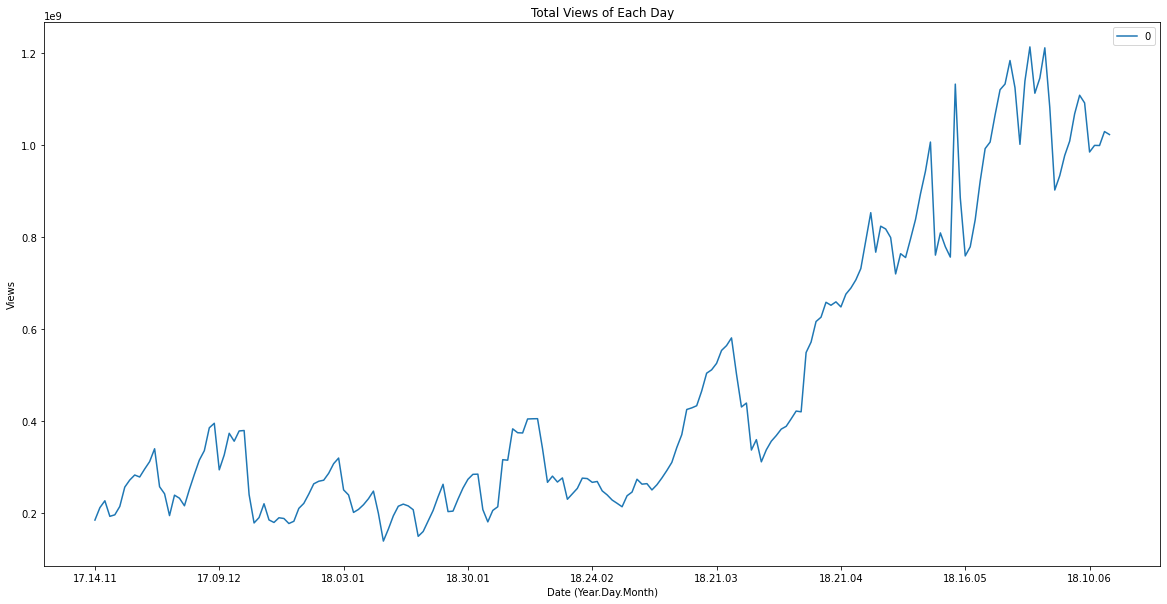

In [31]:
#from operator import itemgetter

df_ = data.reset_index()
date_view = df_[['trending_date', 'views']].values
date_view_counts = {}
for i in date_view:
    if i[0] not in date_view_counts:
        date_view_counts[i[0]] = i[1]
    else:
        date_view_counts[i[0]] += i[1]
dv_df = pd.DataFrame.from_dict(date_view_counts, orient = 'index')
dv_df.plot(rot=0, figsize=(20, 10), title="Total Views of Each Day")
plt.xlabel("Date (Year.Day.Month)")
plt.ylabel("Views")
#plt.savefig('total_views_plot.png')
plt.show()

## Only max views

In [32]:
views=data.groupby(['title'])[['category_name','views','likes','dislikes','comment_count']].max().sort_values(by='views',
                                                                            ascending=False)

views.head(10)

,category_name,views,likes,dislikes,comment_count
title,,,,,
Childish Gambino - This Is America (Official Video),Music,225211923,5023450,343541,517232
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,Entertainment,149376127,3093544,1643059,827755
Ariana Grande - No Tears Left To Cry,Music,148689896,3094021,129502,242039
"Becky G, Natti Natasha - Sin Pijama (Official Video)",Music,139334502,1425496,119798,83941
BTS (방탄소년단) 'FAKE LOVE' Official MV,Music,123010920,5613827,206892,1228655
The Weeknd - Call Out My Name (Official Video),Music,122544931,1427436,40837,55320
"Luis Fonsi, Demi Lovato - Échame La Culpa",Music,102012605,2376636,117196,134224
"Cardi B, Bad Bunny & J Balvin - I Like It [Official Music Video]",Music,94254507,1816753,102474,101077
Marvel Studios' Avengers: Infinity War Official Trailer,Entertainment,91933007,2625661,53709,350458


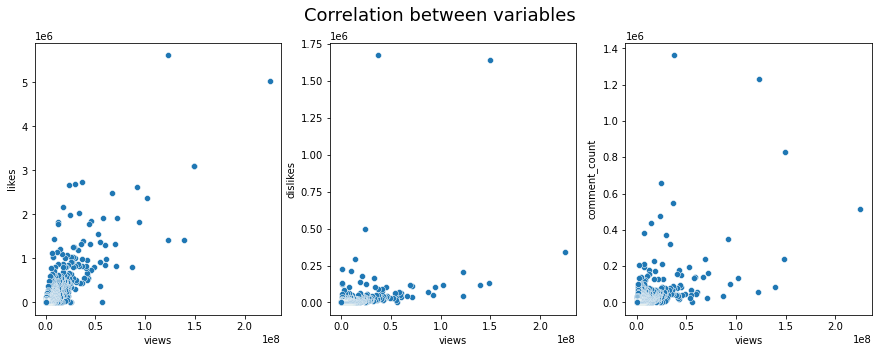

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Correlation between variables', fontsize=18)

sns.scatterplot(ax=axes[0],x='views', y='likes', data=views)
sns.scatterplot(ax=axes[1],x='views', y='dislikes', data=views)
sns.scatterplot(ax=axes[2],x='views', y='comment_count', data=views)
#plt.savefig('corr_multivar.png')
plt.show()

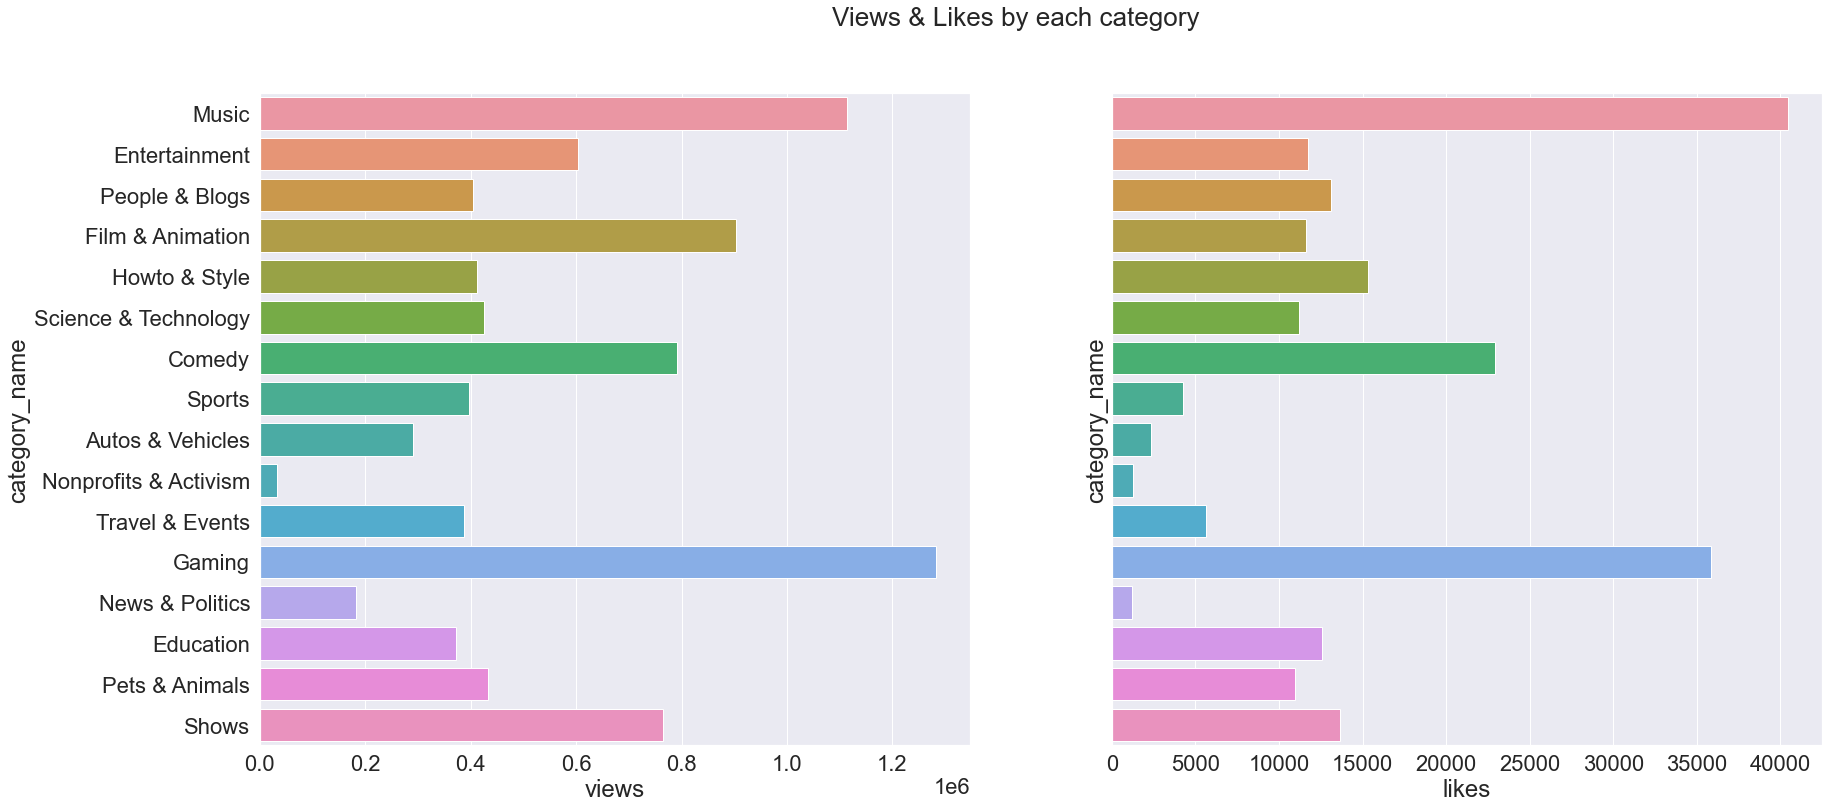

In [75]:
sns.set(font_scale=2)
fig, axes = plt.subplots(1, 2, figsize=(28, 12),sharex=False, sharey=True)
fig.suptitle('Views & Likes by each category', fontsize=26)

sns.barplot(ax=axes[0], data=views, x='views', y='category_name', estimator=median, ci=None)
sns.barplot(ax=axes[1], data=views, x='likes', y='category_name', estimator=median, ci=None);
#sns.boxplot(ax=axes[2], data=exp, x='dislikes', y='category_name')
#plt.savefig('likes_views_category.png')

In [35]:
#lets see the #1 video
gambino=data[data['title']=='Childish Gambino - This Is America (Official Video)'][['views','trending_date','likes']]

In [36]:
#lets see the range
gambino['views'].max()-gambino['views'].min()

193563469

In [37]:
#lets see the spred
gambino.describe().T

,count,mean,std,min,25%,50%,75%,max
views,25.0,1.503396e+08,5.724536e+07,31648454.0,116581406.0,162556776.0,196222618.0,225211923.0
likes,25.0,3.868033e+06,1.038329e+06,1405355.0,3388289.0,4202645.0,4656929.0,5023450.0


In [38]:
#mode
stats.mode(gambino.views)

ModeResult(mode=array([31648454]), count=array([1]))

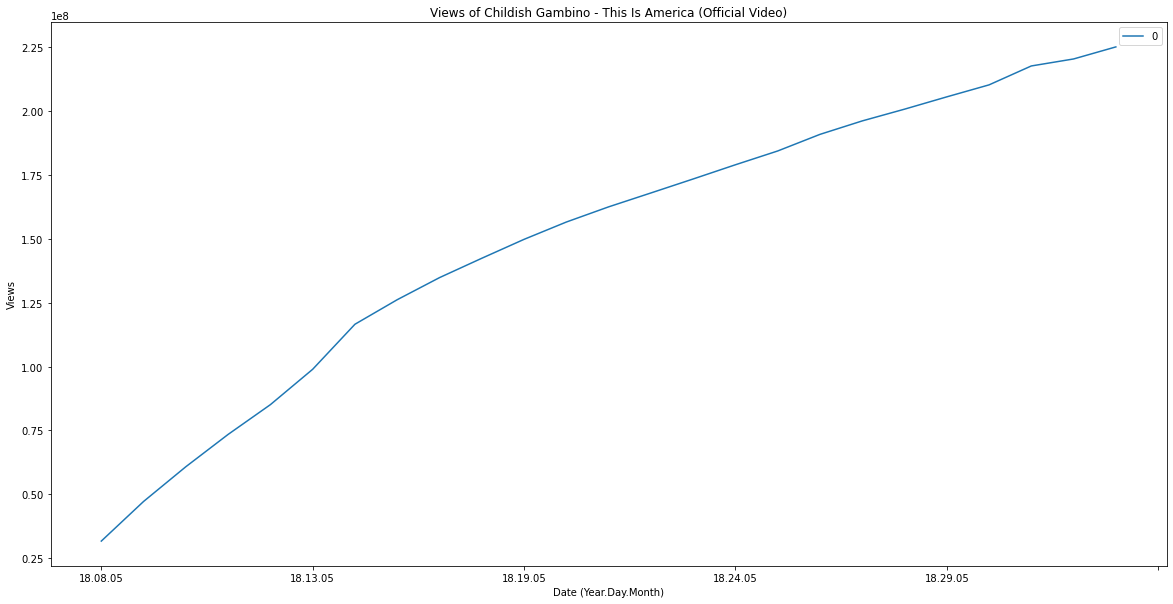

In [39]:
df_ = gambino.reset_index()
date_view = df_[['trending_date', 'views']].values
date_view_counts = {}
for i in date_view:
    if i[0] not in date_view_counts:
        date_view_counts[i[0]] = i[1]
    else:
        date_view_counts[i[0]] += i[1]
dv_df = pd.DataFrame.from_dict(date_view_counts, orient = 'index')
dv_df.plot(rot=0, figsize=(20, 10), title="Views of Childish Gambino - This Is America (Official Video)")
plt.xlabel("Date (Year.Day.Month)")
plt.ylabel("Views")
#plt.savefig('gambino_risedup.png')
plt.show()

**Youtube content that has been trending max time is**

In [47]:
cdf = data.groupby("title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(10)


# fig, ax = plt.subplots(figsize=(8,8))
# _ = sns.barplot(x="video_count", y="title", data=cdf, ax=ax)
# _ = ax.set(xlabel="No. of times", ylabel="Channel")

cdf


,title,video_count
5845,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,30
1081,Charlie Puth - BOY [Official Audio],29
4498,Rooster Teeth Animated Adventures - Millie So ...,29
4629,Sam Smith - Pray (Official Video) ft. Logic,29
6300,YoungBoy Never Broke Again Goes Sneaker Shoppi...,29
5424,"The ULTIMATE $30,000 Gaming PC Setup",29
6148,Why I'm So Scared (being myself and crying too...,29
3782,Mission: Impossible - Fallout (2018) - Officia...,29
6443,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",28
4452,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Cha...",28
